In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Load Required Libraries

In [2]:
#Load Libraries for Data Processing & Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load Libraries for Modelling
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import  variance_inflation_factor
from sklearn import metrics

import os

In [3]:
path = r'D:\18-DS\Datasets-Kaggle\\'
print(path)

D:\18-DS\Datasets-Kaggle\\


# Analyse Data of Given Train & Test File

In [30]:
df_train = pd.read_csv(path+ "house-prices-train.csv")

df_test = pd.read_csv(path+ "house-prices-test.csv")

In [ ]:
df_train.shape

In [ ]:
df_test.shape

In [ ]:
df_train.describe()

In [31]:
house_id = df_train.pop('Id')
SalePrice = df_train.pop("SalePrice")
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
df_train.shape

(1460, 79)

### Null Value Handling

In [32]:
NullFields=list (df_train.isnull().sum() [ df_train.isnull().sum()>0 ].index)

In [33]:
df_train.drop(columns=NullFields, inplace=True)
df_train.shape

(1460, 60)

### Check the data imbalance now

In [ ]:
#df_train.info()

In [34]:
col_num= df_train.columns [ df_train.dtypes!="object"]
len(col_num)

33

In [35]:
col_obj = df_train.columns [ df_train.dtypes=="object"]
len(col_obj)

27

#### Converting Textfield to Numeric Field

In [37]:
df_train.head(1)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal


In [38]:
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [39]:
dummyEncode(df_train).head(2)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,8450,1,3,3,0,4,0,5,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,0,5,2007,8,4


In [40]:
df_train.shape

(1460, 60)

In [ ]:
plt.figure(figsize=(25,25))
i=1
while i <60:
    plt.subplot(12,5,i)
    sns.distplot(df_train[cols[i-1]])
    i+=1
plt.tight_layout()

#### Create Dummy Fields

In [41]:
i=0
while i< len(col_obj):
    temp=pd.get_dummies( df_train[ col_obj[i]], prefix=col_obj[i])
    df_train = pd.concat([df_train,temp], axis=1)
    df_train.drop(columns=[col_obj[i]], inplace=True)
    i+=1

In [42]:
df_train.shape

(1460, 215)

In [43]:
df_train.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_5', 'SaleType_6', 'SaleType_7', 'SaleType_8',
       'SaleCondition_0', 'SaleCondition_1', 'SaleCondition_2',
       'SaleCondition_3', 'SaleCondition_4', 'SaleCondition_5'],
      dtype='object', length=215)

# Approach 1 of Modelling. Create Categorical Variable for Age & Fare

## Prepare Data for Modelling

In [ ]:
#df_train.isna().sum(axis=1)

In [44]:
#X, y Split of Given Data
y = SalePrice
X = df_train
X.shape

(1460, 215)

# Train Test Split

In [134]:
X_train1, X_test1, y_train1, y_test1= train_test_split(X, y, test_size=.30, train_size=.70, random_state=40)

In [135]:
print (X_test1.shape)
print (X_train1.shape)
print (y_test1.shape)
print (y_train1.shape)

(438, 215)
(1021, 215)
(438,)
(1021,)


In [136]:
cols=X_train1.columns

In [50]:
def vif():
    X = X_train1[cols]
    vif = pd.DataFrame()
    vif['Feature']= X.columns
    vif['vif'] = [variance_inflation_factor(X.values,i) for i in range( X.shape[1]) ]
    vif['vif'] = round(vif['vif'],2)
    vif= vif.sort_values("vif",ascending=False)
    print (vif)

In [51]:
def print_train_score():
    print ("R2 Score               :", round( metrics.r2_score       (y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))
    print ("Recall/Senstivity Score:", round( metrics.recall_score   (y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))
    print ("Precision Score        :", round( metrics.precision_score(y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))
    print ("Accuracy Score         :", round( metrics.accuracy_score (y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))
    print ("F1 Score               :", round( metrics.f1_score       (y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))        

In [52]:
def print_test_score():
    print ("R2 Score               :", round( metrics.r2_score       (y_true= y_test1,y_pred= y_test_result['Pred_Final'])       ,3))
    print ("Recall/Senstivity Score:", round( metrics.recall_score   (y_true= y_test1,y_pred= y_test_result['Pred_Final'])   ,3))
    print ("Precision Score        :", round( metrics.precision_score(y_true= y_test1,y_pred= y_test_result['Pred_Final']),3))
    print ("Accuracy Score         :", round( metrics.accuracy_score (y_true= y_test1,y_pred= y_test_result['Pred_Final']) ,3))
    print ("F1 Score               :", round( metrics.f1_score       (y_true= y_test1,y_pred= y_test_result['Pred_Final'])       ,3))
           

#### Scale Numberic Variables

In [137]:
X_train1[col_num].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
498,20,7800,5,7,1967,2004,450,0,414,864,...,288,64,0,0,0,0,0,0,6,2009
8,50,6120,7,5,1931,1950,0,0,952,952,...,468,90,0,205,0,0,0,0,4,2008
309,20,12378,9,5,2003,2004,1274,0,622,1896,...,708,208,175,0,0,0,0,0,11,2006
957,20,7420,5,5,1962,1962,417,0,640,1057,...,576,0,0,0,0,0,0,0,4,2007
1022,50,9439,5,5,1930,1950,324,0,588,912,...,160,0,0,192,0,0,0,0,3,2007


In [138]:
scaler = StandardScaler()
X_train1[col_num] = scaler.fit_transform(X_train1[col_num])

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [139]:
X_train1.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
498,-0.859581,-0.265679,-0.789512,1.304317,-0.147289,0.911495,0.010232,-0.287371,-0.346950,-0.436782,...,0,0,0,1,0,0,0,0,1,0
8,-0.157943,-0.410988,0.642267,-0.494073,-1.337648,-1.694248,-0.953737,-0.287371,0.861916,-0.242389,...,0,0,0,1,1,0,0,0,0,0
309,-0.859581,0.130287,2.074047,-0.494073,1.043070,0.911495,1.775367,-0.287371,0.120418,1.842914,...,0,0,0,1,0,0,0,0,1,0
957,-0.859581,-0.298547,-0.789512,-0.494073,-0.312617,-1.115194,-0.060459,-0.287371,0.160864,-0.010444,...,0,0,0,1,0,0,0,0,1,0
1022,-0.157943,-0.123917,-0.789512,-0.494073,-1.370713,-1.694248,-0.259679,-0.287371,0.044022,-0.330750,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
X_train1[col_num].describe()

### Model with RFE

In [140]:
#from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Importing statsmodels for creating model
import statsmodels.api as sm

# Import variance_inflation_factor To calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import r2_score to get r square score
from sklearn.metrics import r2_score

In [141]:
#Create model using PCA (Principle Component Analysis)
col_all= X_train1.columns
pca    = PCA(svd_solver="randomized",random_state=100)

#Converting normal data to PCA data. Note output is numpy array.
pca_train = pca.fit_transform(X_train1)

#creating dataframe of above PCA data
pca_train = pd.DataFrame(pca_train, columns=col_all, index=X_train1.index)
pca_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
498,-2.312420,-1.109258,-0.948781,0.222739,-1.040932,-0.456205,-1.195863,0.567963,0.327209,0.456808,...,6.383303e-16,-1.133087e-15,4.787726e-16,2.769867e-16,-5.495240e-16,2.689513e-16,-7.620942e-16,6.674768e-16,-4.615549e-16,-1.361153e-16
8,-0.727828,2.601629,1.569629,2.284827,2.629698,1.104598,-0.737493,-0.108445,0.562517,0.179089,...,-3.144483e-16,7.505831e-17,-1.158200e-16,3.811008e-16,-1.660957e-16,8.545041e-16,2.117707e-16,6.936466e-17,-1.469020e-16,3.073071e-16
309,5.409197,-2.406157,1.146931,0.311031,-0.329787,1.035097,1.470681,0.485647,-0.093249,-0.241735,...,-1.734141e-16,2.774758e-16,-2.614829e-16,1.646605e-16,-6.477714e-16,2.116161e-16,7.066386e-18,-5.777670e-16,-8.498946e-17,-9.381241e-17
957,-2.029119,-0.910545,0.189269,1.333800,0.262356,-0.575199,0.728811,-0.794187,0.666770,-0.540413,...,-1.918277e-16,1.930336e-15,-3.222869e-16,-1.145025e-16,-2.455420e-16,4.848683e-16,2.653519e-17,3.867427e-16,5.132475e-16,6.415377e-16
1022,-3.778044,0.655464,0.785200,0.964057,0.382329,1.619964,-0.658078,-0.926874,0.510271,-1.011652,...,-3.539243e-16,4.468352e-17,-1.782322e-16,2.479206e-16,-1.531478e-16,-2.209082e-16,9.381809e-17,1.356213e-16,8.120550e-16,-6.002360e-16


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [78]:
#np.cumsum(pca.explained_variance_ratio_)

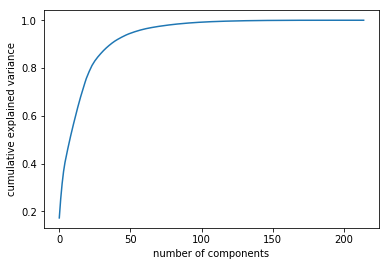

In [142]:
#Making the screeplot - plotting the cumulative variance against the original number of components
fig = plt.figure(figsize = (6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [148]:
pca_train1= pca_train.iloc[::,:60:]

In [143]:
def buildModel(X_data, y_data, number_of_rfe_features, predict=False, train=True, rsquare_train=False):

    if train:
        #Initiate LinearRegression Model Object
        lm = LinearRegression()

        #Fit Model on Train Data
        lm.fit(X_data, y_data)

        #Identify top n features from the dataframe
        rfe = RFE(lm, number_of_rfe_features)             
        rfe = rfe.fit(X_data, y_data)

        #Name of those top n features
        col = X_data.columns[rfe.support_]

        # Creating X_train dataframe with RFE selected variables
        X_train_rfe = X_data[col]

        # Adding a constant variable, because statsmodel.ols 
        #does not have intercept by default and line go through 0,0
        X_train_rfe = sm.add_constant(X_train_rfe)
        
        # Running the linear model
        lm = sm.OLS(y_data,X_train_rfe).fit()
        
        if rsquare_train:
            return r2_score(y_data,lm.predict(X_train_rfe))

    if predict:
        fig = plt.figure(figsize=(15,5))
        
        # Plot heading 
        fig.suptitle('Error Terms', fontsize = 20)  
        plt.subplot(1,2,1)
        #predict the price
        y_train_predict = lm.predict(X_train_rfe)
        
        # Plot the histogram of the error terms
        sns.distplot((y_data - y_train_predict), bins = 20)
        
        # X-label
        plt.xlabel('Errors', fontsize = 18)
        
        # Plot the scattered of the error terms
        plt.subplot(1,2,2)
        sns.scatterplot(y=(y_data - y_train_predict), x=y_train_predict)
        # X-label
        plt.ylabel('Errors', fontsize = 18)
        plt.xlabel("y prediction", fontsize = 18)
        return lm
        
    else:
        #Let's see the summary of our linear model
        print(lm.summary())
        return col, lm

In [144]:
#To avoid these steps again and again. To keep my notebook clean I am putting this in function
#It will give me VIG for X_train_new (this dataframe will keep chaning from one iteration of model to other)
def getVIF(df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print (vif)
    return vif

In [145]:
#During model building This function helps in identifying column which should be dropped based on VIF or p-value

#If pvalue_based is True then it will give name of feature which has highest p value
#else it will give name of feature which has higest VIF

def getfeatureName_toDrop(pvalue_based):
    if pvalue_based:
        nm=list(lm.pvalues.sort_values(ascending=False).head(1).index)[0]
        if nm=="const":
            nm=list(lm.pvalues.sort_values(ascending=False).head(2).index)[1]
        return nm
    else:
        return list(vif.Features.head(1))[0]

In [186]:
print(pca_train1.shape)
print (y_train1.shape)

(1021, 47)
(1021,)


In [187]:
n=30
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     152.4
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:52:17   Log-Likelihood:                -12124.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                     990   BIC:                         2.446e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.812e+05   1104.439    164.

In [155]:
getfeatureName_toDrop(True)

'LandSlope_1'

In [156]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:LandSlope_1
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     148.0
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:42:29   Log-Likelihood:                -12136.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     990   BIC:                         2.449e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          

In [157]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:Street_1
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     148.1
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:42:30   Log-Likelihood:                -12136.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     990   BIC:                         2.449e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.

In [158]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:MSZoning_0
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     149.3
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:42:31   Log-Likelihood:                -12133.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     990   BIC:                         2.448e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           

In [159]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:YrSold
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     149.0
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:42:32   Log-Likelihood:                -12134.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     990   BIC:                         2.448e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.81

In [160]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:LandContour_3
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     149.1
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:42:33   Log-Likelihood:                -12133.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     990   BIC:                         2.448e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const        

In [161]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:LotShape_1
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     149.1
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:42:34   Log-Likelihood:                -12133.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     990   BIC:                         2.448e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           

In [162]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:MSZoning_4
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     151.4
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:42:34   Log-Likelihood:                -12127.
No. Observations:                1021   AIC:                         2.432e+04
Df Residuals:                     990   BIC:                         2.447e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           

In [163]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:LandContour_0
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     152.2
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:42:35   Log-Likelihood:                -12125.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                     990   BIC:                         2.446e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const        

In [164]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:Utilities_0
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     152.0
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:42:36   Log-Likelihood:                -12125.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                     990   BIC:                         2.447e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          

In [166]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:EnclosedPorch
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     152.2
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:43:02   Log-Likelihood:                -12125.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                     990   BIC:                         2.446e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const        

In [167]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:GarageCars
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     151.8
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:43:17   Log-Likelihood:                -12126.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                     990   BIC:                         2.447e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           

In [168]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:MSZoning_1
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     151.7
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:43:31   Log-Likelihood:                -12126.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                     990   BIC:                         2.447e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           

In [169]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:LotConfig_1
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     152.4
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:43:46   Log-Likelihood:                -12124.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                     990   BIC:                         2.446e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          

In [185]:
pca_train1.shape

(1021, 47)

In [170]:
vif=getVIF(pca_train1)

          Features  VIF
0       MSSubClass  1.0
35      LotShape_3  1.0
26     ScreenPorch  1.0
27        PoolArea  1.0
28         MiscVal  1.0
29          MoSold  1.0
30      MSZoning_2  1.0
31      MSZoning_3  1.0
32        Street_0  1.0
33      LotShape_0  1.0
34      LotShape_2  1.0
36   LandContour_1  1.0
24     OpenPorchSF  1.0
37   LandContour_2  1.0
38     Utilities_1  1.0
39     LotConfig_0  1.0
40     LotConfig_2  1.0
41     LotConfig_3  1.0
42     LotConfig_4  1.0
43     LandSlope_0  1.0
44     LandSlope_2  1.0
45  Neighborhood_0  1.0
25       3SsnPorch  1.0
23      WoodDeckSF  1.0
1          LotArea  1.0
11        2ndFlrSF  1.0
2      OverallQual  1.0
3      OverallCond  1.0
4        YearBuilt  1.0
5     YearRemodAdd  1.0
6       BsmtFinSF1  1.0
7       BsmtFinSF2  1.0
8        BsmtUnfSF  1.0
9      TotalBsmtSF  1.0
10        1stFlrSF  1.0
12    LowQualFinSF  1.0
22      GarageArea  1.0
13       GrLivArea  1.0
14    BsmtFullBath  1.0
15    BsmtHalfBath  1.0
16        FullBa

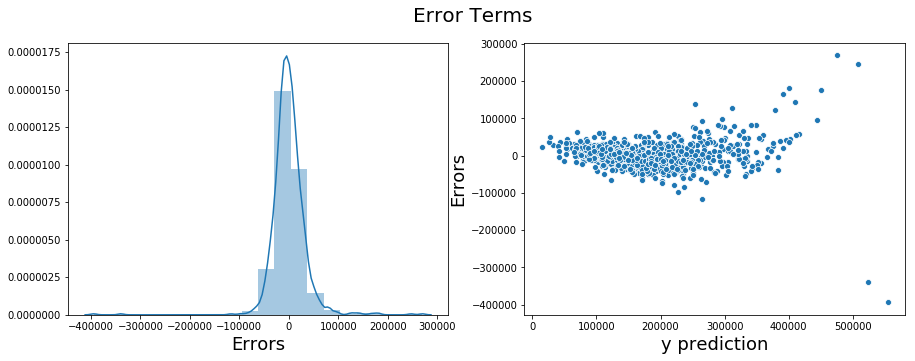

In [171]:
lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=True,train=True)
#Errors are normally distributed equally around 0. It is little right tailed.
#Erros are white noise.
#Errors terms have homoscedastisity

#### Test Model

In [172]:
X_test1.shape

(438, 215)

In [213]:
cols_final = list(lm.params.index)
cols_final.remove("const")

In [214]:
print (pca_test.shape)
print (pca_train1.shape)
print (X_test1.shape)
print (len(cols_final))

(438, 215)
(1021, 47)
(438, 215)
30


In [215]:
pca_Test1.shape

(438, 30)

Text(0, 0.5, 'y_pred')

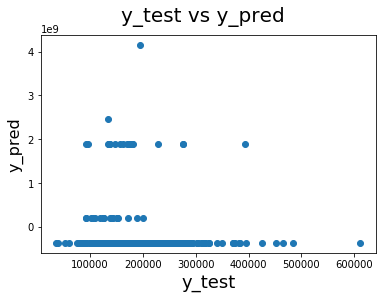

In [217]:
# Making predictions
xCols=X_test1.columns
X_test1[col_num] = scaler.transform(X_test1[col_num])

pca_test=pca.transform(X_test1)
pca_test = pd.DataFrame(pca_test, columns=xCols, index=X_test1.index)
pca_test1 = pca_test[cols_final]

y_pred = lm.predict(  sm.add_constant(pca_test1))

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test1,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [218]:
buildModel(X_test1, y_test1, number_of_rfe_features=n,predict=True,train=True, rsquare_train=True)

0.4910161485018977

In [222]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

xgb = XGBRegressor(n_estimators = 500, 
                   learning_rate=0.05, 
                   subsample= 0.75, 
                   colsample_bytree = 0.63
                       )
kf = KFold(n_splits=5)
y_pred = cross_val_score(xgb, pca_train1, y_train1, cv=kf, n_jobs=-1)
y_pred.mean()

0.8567331034294389

In [223]:
kf = KFold(n_splits=5)
y_pred = cross_val_score(xgb, pca_test1, y_test1, cv=kf, n_jobs=-1)
y_pred.mean()

0.6678839076737362

In [ ]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": final_predictions
    })
submission.to_csv('submission.csv', index=False)